# Calculate 12-Month Climatology for intpp-hist & Decadal Climatologies for intpp-ssp585

#Andrea Fassbender
#10/17/2019

In [23]:
%matplotlib inline

import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [24]:
# Load Historical Data Files

ds_lon = xr.open_dataset('Data/ds_lon.nc')
ds_lat = xr.open_dataset('Data/ds_lat.nc')

ds_hist = xr.open_dataset('Data/hist_intpp_mask.nc')
ds_hist_oa = xr.open_dataset('Data/hist_oa_mask.nc')

In [25]:
ds_lat

<xarray.Dataset>
Dimensions:  (nlat: 384, nlon: 320)
Coordinates:
  * nlat     (nlat) int32 1 2 3 4 5 6 7 8 9 ... 377 378 379 380 381 382 383 384
  * nlon     (nlon) int32 1 2 3 4 5 6 7 8 9 ... 313 314 315 316 317 318 319 320
Data variables:
    lat      (nlat, nlon) float64 ...

# Historical 12-Month Climatolgoy

In [3]:
#ds_hist
#1980/12 = 165 1850 to 2014

In [26]:
#Calculate climatologies and StDevs
clim_m_hist = ds_hist.groupby('time.month').mean('time')
clim_std_hist = ds_hist.groupby('time.month').std('time')

/ncar/usr/jupyterhub/envs/cmip6-201910a/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


Climatologies take some time to compute so save the output and load that instead


In [32]:
#save climatology and stdev
#clim_m_hist.to_netcdf('Data/clim_m_hist.nc') 
#clim_std_hist.to_netcdf('Data/clim_std_hist.nc') 

#load climatology and stdev
# clim_m_hist = xr.open_dataset('Data/clim_m_hist.nc')
# clim_std_hist = xr.open_dataset('Data/clim_std_hist.nc')

In [33]:
clim_m_hist.intpp
#.intpp

<xarray.DataArray 'intpp' (month: 12, member_id: 1, nlat: 384, nlon: 320)>
array([[[[          nan,           nan,           nan, ...,
                    nan,           nan,           nan],
         [          nan,           nan,           nan, ...,
                    nan,           nan,           nan],
         [1.5645018e-09, 2.0036361e-09, 1.6633597e-09, ...,
                    nan,           nan,           nan],
         ...,
         [          nan,           nan,           nan, ...,
                    nan,           nan,           nan],
         [          nan,           nan,           nan, ...,
                    nan,           nan,           nan],
         [          nan,           nan,           nan, ...,
                    nan,           nan,           nan]]],


       [[[          nan,           nan,           nan, ...,
                    nan,           nan,           nan],
         [          nan,           nan,           nan, ...,
                    nan,           

In [34]:
clim_std_hist

<xarray.Dataset>
Dimensions:    (member_id: 1, month: 12, nlat: 384, nlon: 320)
Coordinates:
  * nlat       (nlat) int32 1 2 3 4 5 6 7 8 ... 377 378 379 380 381 382 383 384
  * member_id  (member_id) object 'r1i1p1f1'
  * nlon       (nlon) int32 1 2 3 4 5 6 7 8 ... 313 314 315 316 317 318 319 320
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    intpp      (month, member_id, nlat, nlon) float32 nan nan nan ... nan nan

In [35]:
# Load Riley's function (Hilary sent me this via slack direct message)
# note: the function operates in the order of the variable indices in the dataset, and thus returns 
# lat/lon, even though you enter your inputs as lon/lat
def find_indices(xgrid, ygrid, xpoint, ypoint):
   """Returns the i, j index for a latitude/longitude point on a grid.
   .. note::
       Longitude and latitude points (``xpoint``/``ypoint``) should be in the same
       range as the grid itself (e.g., if the longitude grid is 0-360, should be
       200 instead of -160).
   Args:
       xgrid (array_like): Longitude meshgrid (shape M, N)
       ygrid (array_like): Latitude meshgrid (shape M, N)
       xpoint (int or double): Longitude of point searching for on grid.
       ypoint (int or double): Latitude of point searching for on grid.
   Returns:
       i, j (int):
           Keys for the inputted grid that lead to the lat/lon point the user is
           seeking.
   Examples:
       >>> import esmtools as et
       >>> import numpy as np
       >>> x = np.linspace(0, 360, 37)
       >>> y = np.linspace(-90, 90, 19)
       >>> xx, yy = np.meshgrid(x, y)
       >>> xp = 20
       >>> yp = -20
       >>> i, j = et.spatial.find_indices(xx, yy, xp, yp)
       >>> print(xx[i, j])
       20.0
       >>> print(yy[i, j])
       -20.0
   """
   dx = xgrid - xpoint
   dy = ygrid - ypoint
   reduced_grid = abs(dx) + abs(dy)
   min_ix = np.nanargmin(reduced_grid)
   i, j = np.unravel_index(min_ix, reduced_grid.shape)
   return i, j

Text(0.5, 1.0, 'Location Comparisons')

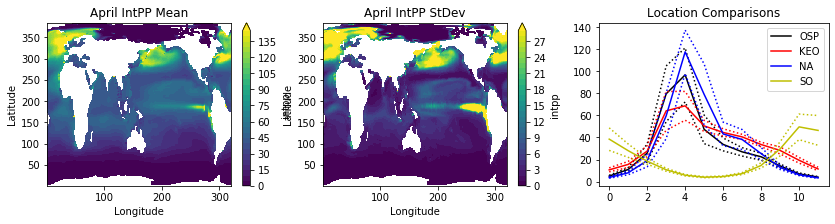

In [191]:
#historical

fig = plt.figure(figsize=(14, 3))

# Irregular levels to illustrate the use of a proportional colorbar
levels = np.arange(0, 150, 5)
levels2 = np.arange(0, 30, 1)

ax = fig.add_subplot(1, 3, 1)
(clim_m_hist.intpp*(10**8)).isel(month=4).plot(levels=levels)
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
plt.title('April IntPP Mean')

ax = fig.add_subplot(1, 3, 2)
(clim_std_hist.intpp*(10**8)).isel(month=4).plot(levels=levels2)
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
plt.title('April IntPP StDev')

# Identify indecies associated with osp, keo ,and NA
[a,b]=find_indices(ds_lon.lon, ds_lat.lat, 360-145, 50)
[a2,b2]=find_indices(ds_lon.lon, ds_lat.lat, 144.6, 32.4)
[a3,b3]=find_indices(ds_lon.lon, ds_lat.lat, 360-47.2, 50)
[a4,b4]=find_indices(ds_lon.lon, ds_lat.lat, 100, -45)

ax = fig.add_subplot(1, 3, 3)
var = clim_m_hist.intpp.isel(nlon=b,nlat=a,member_id=0)*10**8
var2 = clim_m_hist.intpp.isel(nlon=b2,nlat=a2,member_id=0)*10**8
var3 = clim_m_hist.intpp.isel(nlon=b3,nlat=a3,member_id=0)*10**8
var4 = clim_m_hist.intpp.isel(nlon=b4,nlat=a4,member_id=0)*10**8

var_st = clim_std_hist.squeeze().intpp[:, a, b]*10**8
#the above code (vs the below) is a way to remove the member dimesion and selec
#for all times at the a and b indices for lat/lon using slice
#clim_std_hist.intpp.isel(nlon=b,nlat=a,member_id=0)*10**8
var2_st = clim_std_hist.intpp.isel(nlon=b2,nlat=a2,member_id=0)*10**8
var3_st = clim_std_hist.intpp.isel(nlon=b3,nlat=a3,member_id=0)*10**8
var4_st = clim_std_hist.intpp.isel(nlon=b4,nlat=a4,member_id=0)*10**8

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

plt.plot(var,'k',label='OSP')
plt.plot(var+var_st,':k')
plt.plot(var-var_st,':k')
plt.plot(var2,'r',label='KEO')
plt.plot(var2+var2_st,':r')
plt.plot(var2-var2_st,':r')
plt.plot(var3,'b',label='NA')
plt.plot(var3+var3_st,':b')
plt.plot(var3-var3_st,':b')
plt.plot(var4,'y',label='SO')
plt.plot(var4+var4_st,':y')
plt.plot(var4-var4_st,':y')
plt.legend()
plt.title('Location Comparisons')

# SSP585 Decadal Climatologies

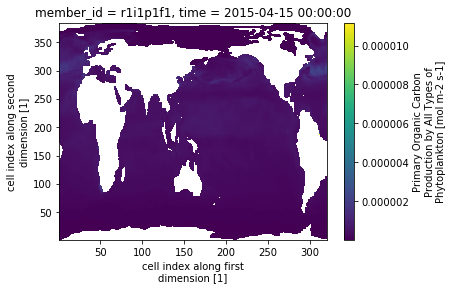

In [255]:
# Load SSP585 Data Files
ds_85_oa = xr.open_dataset('Data/ssp585_oa_mask.nc')
ds_85 = xr.open_dataset('Data/ssp585_intpp_mask.nc')
ds_85.squeeze().intpp

#ds_85.squeeze().intpp.isel(time=3).plot()

In [206]:
# Create xarrays to save mean and stdev climatologies into (else you get arrays with no coordainte info...)

# Create string of years bounding decades to loop through
dlist = np.arange(2020,2100,10)

# Pre-allocate: length of dlist = number of decades; 12 = months in climatology; lat/lon from ds_85
pre = np.zeros((len(dlist), 12, ds_85.intpp.shape[2], ds_85.intpp.shape[3])) * np.nan
times = pd.date_range(start=2025,end=2195,periods=len(dlist))

# Create empty data arrays
d_clim = xr.DataArray(pre, coords=[times, np.arange(1,13), ds_85.nlat, ds_85.nlon], dims=['time','month', 'lat', 'lon'])
d_std  = xr.DataArray(pre, coords=[times, np.arange(1,13), ds_85.nlat, ds_85.nlon], dims=['time','month', 'lat', 'lon'])

In [207]:
d_clim.shape

(8, 12, 384, 320)

In [208]:
# Calculate cliamtolgoies for each decade #OMG...we're doing it!!!

# Start the loop. note, using enumerate allows you to link i to the index (0,1,2) and t to the values of dlist
for i, t in enumerate(dlist):
    print(str(t)+'-01-01', str(t+9)+'-12-31')
    ds_85_sub = ds_85.squeeze().intpp.sel(time=slice(str(t)+'-01-01', str(t+9)+'-12-31'))
    m_85_sub = ds_85_sub.groupby('time.month').mean('time')
    d_clim[i,:,:,:] = m_85_sub
    std_85_sub = ds_85_sub.groupby('time.month').std('time')
    d_std[i,:,:,:] = std_85_sub
    
    # The issue I'm stopping at is that python doesn't ike that std_85_sub is (1, 12, 332, 362) while the data array
    # we are saving into is (8, 12, 332, 362)

2020-01-01 2029-12-31
2030-01-01 2039-12-31
2040-01-01 2049-12-31
2050-01-01 2059-12-31
2060-01-01 2069-12-31
2070-01-01 2079-12-31
2080-01-01 2089-12-31
2090-01-01 2099-12-31


In [257]:
type(d_clim)
d_clim.shape
#len(d_clim[:,1,1,1])

(8, 12, 384, 320)

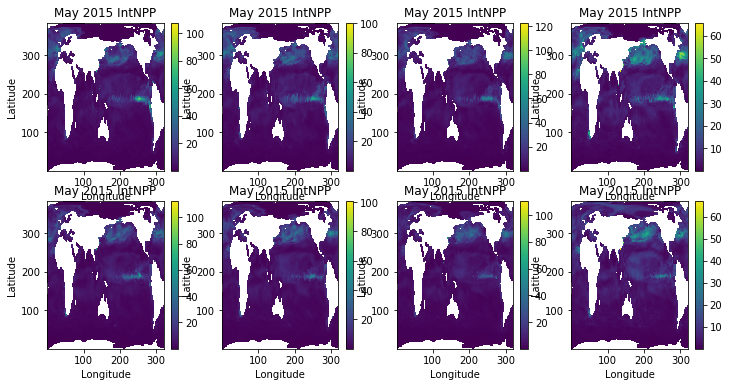

In [258]:
# plot ot make sure things worked

fig = plt.figure(figsize=(12, 6))

for i in range(d_clim.shape[0]):
    ax = fig.add_subplot(2, 4, i+1)
    #plt.plot(d_clim[i,6,:,:]*(10**8))
    (d_clim*(10**8)).isel(time=i,month=3).plot()
    ax.set_ylabel('Latitude')
    ax.set_xlabel('Longitude')
    plt.title('May 2015 IntNPP')
 

In [24]:
d_clim.min

<function ndarray.min>